#### Описание проекта

Есть стартап, который продаёт продукты питания. Нужно разобраться, как ведут себя пользователи мобильного приложения.
Изучим воронку продаж. Узнаем, как пользователи доходят до покупки. Сколько пользователей доходит до покупки, а сколько — «застревает» на предыдущих шагах? На каких именно?

После этого исследуем результаты A/A/B-эксперимента. Дизайнеры захотели поменять шрифты во всём приложении, а менеджеры испугались, что пользователям будет непривычно. Договорились принять решение по результатам A/A/B-теста. Пользователей разбили на 3 группы: 2 контрольные со старыми шрифтами и одну экспериментальную — с новыми. Выясните, какой шрифт лучше.

Создание двух групп A вместо одной имеет определённые преимущества. Если две контрольные группы окажутся равны, вы можете быть уверены в точности проведенного тестирования. Если же между значениями A и A будут существенные различия, это поможет обнаружить факторы, которые привели к искажению результатов. Сравнение контрольных групп также помогает понять, сколько времени и данных потребуется для дальнейших тестов.

In [1]:
import pandas as pd
from datetime import datetime
from scipy import stats as st
import math as mth
import matplotlib.pyplot as plt

In [2]:
try: df = pd.read_csv(r'C:\Users\v.ipatko\Desktop\Pract\dataset\project 2\logs_exp.csv', sep='\t')
except: df = pd.read_csv('/datasets/logs_exp.csv', sep='\t')

In [3]:
df

,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248
...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,1565212345,247
244122,MainScreenAppear,5849806612437486590,1565212439,246
244123,MainScreenAppear,5746969938801999050,1565212483,246
244124,MainScreenAppear,5746969938801999050,1565212498,246


#### Заменим названия столбцов

In [4]:
df = df.rename(columns={'EventName':'event_name', 'DeviceIDHash': 'device_id', 'EventTimestamp': 'timestamp', 'ExpId': 'group'})

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   event_name  244126 non-null  object
 1   device_id   244126 non-null  int64 
 2   timestamp   244126 non-null  int64 
 3   group       244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB


#### Преборазуем типы данных

In [6]:
df['dt'] = pd.to_datetime(df['timestamp'], unit='s')
df['date'] = pd.to_datetime(df['timestamp'], unit='s').dt.date

In [7]:
df

,event_name,device_id,timestamp,group,dt,date
0,MainScreenAppear,4575588528974610257,1564029816,246,2019-07-25 04:43:36,2019-07-25
1,MainScreenAppear,7416695313311560658,1564053102,246,2019-07-25 11:11:42,2019-07-25
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25
3,CartScreenAppear,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248,2019-07-25 11:48:42,2019-07-25
...,...,...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,1565212345,247,2019-08-07 21:12:25,2019-08-07
244122,MainScreenAppear,5849806612437486590,1565212439,246,2019-08-07 21:13:59,2019-08-07
244123,MainScreenAppear,5746969938801999050,1565212483,246,2019-08-07 21:14:43,2019-08-07
244124,MainScreenAppear,5746969938801999050,1565212498,246,2019-08-07 21:14:58,2019-08-07


#### Провериим датасет на наличие дубликатов и удалим их

In [8]:
df.duplicated().sum()

413

In [9]:
df.drop_duplicates(inplace=True)

#### Всего событий в логе:

In [10]:
df['event_name'].count()

243713

#### Всего пользователей в логе

In [11]:
users_total = df['device_id'].nunique()
users_total

7551

#### В среднем событий на пользователя: 32

In [12]:
df.groupby('device_id')['event_name'].count().mean()

32.27559263673685

#### Найдём даты первого и последнего события

In [13]:
df['date'].min()

datetime.date(2019, 7, 25)

In [14]:
df['date'].max()

datetime.date(2019, 8, 7)

In [15]:
df['dt'].max() - df['dt'].min()  

Timedelta('13 days 16:31:41')

Располагаем данными за период длинной в две недели

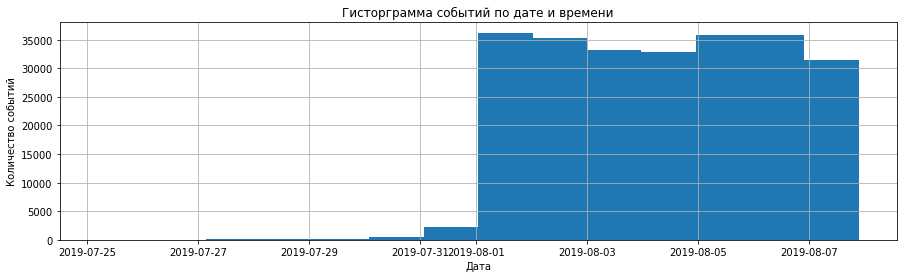

In [16]:
df['dt'].hist(bins=14,figsize=(15,4))
plt.title('Гисторграмма событий по дате и времени')
plt.xlabel('Дата')
plt.ylabel('Количество событий');

In [17]:
df_n = df[df['dt'] > '2019-08-01']

#### Отбросим данные до первого августа, они искажают общую картину. В общей сложности будем рассматривать период длинной в неделю

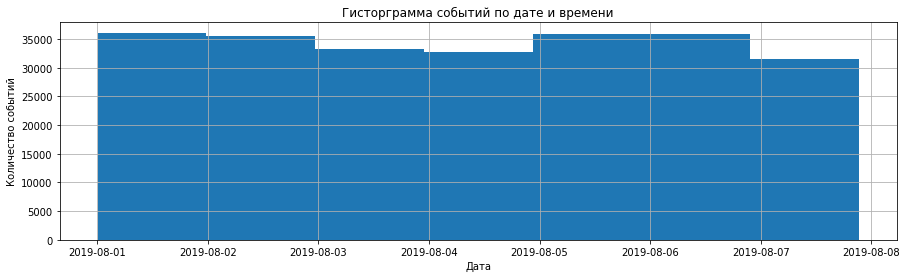

In [18]:
df_n['dt'].hist(bins=7,figsize=(15,4))
plt.title('Гисторграмма событий по дате и времени')
plt.xlabel('Дата')
plt.ylabel('Количество событий');

In [19]:
df_n.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240887 entries, 2828 to 244125
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   event_name  240887 non-null  object        
 1   device_id   240887 non-null  int64         
 2   timestamp   240887 non-null  int64         
 3   group       240887 non-null  int64         
 4   dt          240887 non-null  datetime64[ns]
 5   date        240887 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 12.9+ MB


In [20]:
df['event_name'].count() - df_n['event_name'].count()

2826

In [21]:
((df['event_name'].count() - df_n['event_name'].count())/df['event_name'].count()) * 100

1.159560630741897

#### После фильтрации данных мы потеряли 2828 события

Что составляет чуть более 1% от первоначальных данных

In [22]:
df['device_id'].nunique() - df_n['device_id'].nunique()

17

In [23]:
((df['device_id'].nunique() - df_n['device_id'].nunique())/df['device_id'].nunique()) * 100

0.22513574361011784

#### И 17 пользователей

Что составляет менее половины процента от первоначальных данных

In [24]:
df_n['group'].value_counts()

248    84563
246    79302
247    77022
Name: group, dtype: int64

In [25]:
df_n.groupby('group')['device_id'].nunique()

group
246    2484
247    2513
248    2537
Name: device_id, dtype: int64

#### В очищенном датасете есть пользователи из всех трёх экспериментальных групп

In [26]:
events_count = df_n.groupby('event_name').agg({'device_id': 'count'}).sort_values(by='device_id', ascending=False)

#### Посмотрим какие события есть в нашем датасете и отсортируем их по частоте

In [27]:
events_count

,device_id
event_name,
MainScreenAppear,117328
OffersScreenAppear,46333
CartScreenAppear,42303
PaymentScreenSuccessful,33918
Tutorial,1005


In [28]:
users_count = df_n.groupby('event_name').agg({'device_id': 'nunique'}).sort_values(by='device_id', ascending=False)

#### Найдём какой процент пользователей совершал каждое событие

In [29]:
users_count['%'] = users_count['device_id']/df_n['device_id'].nunique()
users_count

,device_id,%
event_name,,
MainScreenAppear,7419,0.984736
OffersScreenAppear,4593,0.609636
CartScreenAppear,3734,0.495620
PaymentScreenSuccessful,3539,0.469737
Tutorial,840,0.111495


In [30]:
users_count.drop(index='Tutorial', axis=0, inplace=True)

#### Сначала появляется главный экран - далее экран с предложением, далее корзина, потом экран успешной уплаты. Экран с обучением наверняка где-то совсем в стороне. Возможно после экрана успешной оплаты снова открывается главный экран. 

Можно исключить из воронки событие tutorial. Это действие не обязательно.

In [31]:
users_count

,device_id,%
event_name,,
MainScreenAppear,7419,0.984736
OffersScreenAppear,4593,0.609636
CartScreenAppear,3734,0.495620
PaymentScreenSuccessful,3539,0.469737


In [32]:
users_count['next_step'] = users_count['device_id'].shift(1, fill_value=0)

In [33]:
users_count['conversion'] = (users_count['device_id']/users_count['next_step']) * 100

In [34]:
users_count['losses'] = 100 - users_count['conversion']

#### 38% Пользователей теряются на переходе с главного экрана на экран с приложением

In [35]:
users_count

,device_id,%,next_step,conversion,losses
event_name,,,,,
MainScreenAppear,7419,0.984736,0,inf,-inf
OffersScreenAppear,4593,0.609636,7419,61.908613,38.091387
CartScreenAppear,3734,0.495620,4593,81.297627,18.702373
PaymentScreenSuccessful,3539,0.469737,3734,94.777718,5.222282


In [36]:
users_count['device_id'][3]/users_count['device_id'][0] * 100

47.70184661005526

#### от первого события до оплаты доходят 47% пользователей.

In [37]:
df_n.groupby('group')['device_id'].nunique()

group
246    2484
247    2513
248    2537
Name: device_id, dtype: int64

#### Размеры экспериментальных групп

In [38]:
new = df_n.groupby('device_id')['group'].nunique().to_frame()

In [39]:
new[new['group'] > 1]

,group
device_id,


Во всех группах нет пересекающихся пользователей.

#### Самое популярное событие - открытие главного экрана

In [40]:
group_246 = df_n[df_n['group']==246]
group_247 = df_n[df_n['group']==247]

trials = []
trials.append(group_246['device_id'].nunique())
trials.append(group_247['device_id'].nunique())

In [41]:
group_246_uniq_by_step = group_246.groupby('event_name').agg({'device_id': 'nunique'}).sort_values(by='device_id', ascending=False)
suc_246 = list(group_246_uniq_by_step['device_id'])
print(f'В 246 группе {suc_246[0]} пользователей открыли главный экран')
print(f'Это {round((suc_246[0]/trials[0])*100, 2)} % от общего числа пользователей в группе')

В 246 группе 2450 пользователей открыли главный экран
Это 98.63 % от общего числа пользователей в группе


In [42]:
group_247_uniq_by_step = group_247.groupby('event_name').agg({'device_id': 'nunique'}).sort_values(by='device_id', ascending=False)
suc_247 = list(group_247_uniq_by_step['device_id'])
print(f'В 247 группе {suc_247[0]} пользователей открыли главный экран')
print(f'Это {round((suc_247[0]/trials[1])*100, 2)} % от общего числа пользователей в группе')

В 247 группе 2476 пользователей открыли главный экран
Это 98.53 % от общего числа пользователей в группе


In [43]:
def testing(one, two, three, four):
    alpha = 0.05
    p1 = one/three
    p2 = two/four
    p_combined = (one+ two)/ (three + four)
    dif = p1-p2
 
    z_value = dif / mth.sqrt(p_combined * (1 - p_combined) * (1/three + 1/four))

    distr = st.norm(0, 1) 
 
    p_value = (1 - distr.cdf(abs(z_value))) * 2 
    print(f'p-значение: {p_value}')
    if (p_value < alpha):
        print("Отвергаем нулевую гипотезу: между долями есть значимая разница")
    else:
        print("Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными")
        
        
    

Во всех наших экспериментах мы сравниваем нулевую гипотезу Н0 - доли в обеих группах одинаковы. И альтернативную гипотезу Н1 - доли в сравниваемых группах отличаются

mains screen

In [44]:
testing(suc_246[0], suc_247[0], trials[0], trials[1])

p-значение: 0.7570597232046099
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


offer screen

In [45]:
testing(suc_246[1], suc_247[1], trials[0], trials[1])

p-значение: 0.2480954578522181
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


Cart screen

In [46]:
testing(suc_246[2], suc_247[2], trials[0], trials[1])

p-значение: 0.22883372237997213
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


Payment screen

In [47]:
testing(suc_246[3], suc_247[3], trials[0], trials[1])

p-значение: 0.11456679313141849
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


#### Результаты статистически не значимы, разбиение работает корректно.

In [48]:
group_248 = df_n[df_n['group']==248]
trials.append(group_248['device_id'].nunique())

In [49]:
group_248_uniq_by_step = group_248.groupby('event_name').agg({'device_id': 'nunique'}).sort_values(by='device_id', ascending=False)
suc_248 = list(group_248_uniq_by_step['device_id'])
print(f'В 248 группе {suc_248[0]} пользователей открыли главный экран')
print(f'Это {round((suc_248[0]/trials[2])*100, 2)} % от общего числа пользователей в группе')

В 248 группе 2493 пользователей открыли главный экран
Это 98.27 % от общего числа пользователей в группе


main screen

In [50]:
testing(suc_246[0], suc_248[0], trials[0], trials[2])

p-значение: 0.2949721933554552
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


offer screen

In [51]:
testing(suc_246[1], suc_248[1], trials[0], trials[2])

p-значение: 0.20836205402738917
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


cart screen

In [52]:
testing(suc_246[2], suc_248[2], trials[0], trials[2])

p-значение: 0.07842923237520116
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


payment screen

In [53]:
testing(suc_246[3], suc_248[3], trials[0], trials[2])

p-значение: 0.2122553275697796
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


#### Между 246 и 248 разницы нет

### Сравним группы 247 и 248

main screen

In [54]:
testing(suc_246[0], suc_248[0], trials[1], trials[2])

p-значение: 0.05661336589860122
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


offer screen

In [55]:
testing(suc_246[1], suc_248[1], trials[1], trials[2])

p-значение: 0.46038693051414503
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


cart screen

In [56]:
testing(suc_246[2], suc_248[2], trials[1], trials[2])

p-значение: 0.17793756017873896
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


payment screen

In [57]:
testing(suc_246[3], suc_248[3], trials[1], trials[2])

p-значение: 0.3927720688492329
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


#### Между 247 и 248 разницы нет

### Сравним с объединённой 246 и 247 с 248

In [58]:
groups = [246,247]
group_d = df_n[df_n['group'].isin(groups)]

In [59]:
trials.append(group_d['device_id'].nunique())

In [60]:
group_d_uniq_by_step = group_d.groupby('event_name').agg({'device_id': 'nunique'}).sort_values(by='device_id', ascending=False)
suc_d = list(group_d_uniq_by_step['device_id'])
print(f'В объединённой группе {suc_d[0]} пользователей открыли главный экран')
print(f'Это {round((suc_d[0]/trials[3])*100, 2)} % от общего числа пользователей в группе')

В объединённой группе 4926 пользователей открыли главный экран
Это 98.58 % от общего числа пользователей в группе


main screen

In [61]:
testing(suc_d[0], suc_248[0], trials[3], trials[2])

p-значение: 0.29424526837179577
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


offer screen

In [62]:
testing(suc_d[1], suc_248[1], trials[3], trials[2])

p-значение: 0.43425549655188256
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


cart screen

In [63]:
testing(suc_d[2], suc_248[2], trials[3], trials[2])

p-значение: 0.18175875284404386
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


payment screen

In [64]:
testing(suc_d[3], suc_248[3], trials[3], trials[2])

p-значение: 0.6004294282308704
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


#### Сравнение результатов c объединенной контрольной группой также не показало значимой разницы.

Мы проводим множественный тест, т.е. берем несколько выборок из одного и того же набора данных, в нашем случае по 4 для сравнения каждой из групп. С каждой новой проверкой гипотезы растёт вероятность ошибки первого рода. Поэтому мы должны скорректировать наши конечные p_value для сравнения их значений с alpha (в этом нет необходимости, т.к. ни по одному из проведенных сравнений не обнаружилось статзначимых различий)

Если бы был смысл применять поправку на множественные сравнения то я бы выбрал метод Шидака - он наиболее точен. И в нашем случае alpha была бы рассчитана как 1 - (1 - 0.05)^(1/4) = 0.0127

### Вывод
Анализируя гистограмму по дате и времени, мы приняли решение отбросить неполные данные и оставить только период с 2019-08-01.

При исследовании воронки событий мы выяснили, что от первого события до оплаты доходит меньше половины пользователей 47,7%.
Только 98,5% всех пользователей хотя бы раз открывали главную страницу приложения (возможно оставшиеся пользователи не смогли попасть на главную страницу из-за ошибок/некорректной работы приложения).
Только 4593 пользователей хотя бы раз открывали страницу с каталогом товаров (38% пользователей не увидели даже каталог товаров необходимо выяснить причину, возможно приложение не на всех устройствах работает корректно).

Мы провели 16 проверок статистических гипотез с уровнем значимости 0.05 (12 из них проверяли разницу между контрольными группами и группой с изменённым шрифтом) и ни одна из них не выявила значимой разницы.

При уровне значимости 0.1 каждый десятый раз можно получать ложный результат, поэтому стоит применить изначально выбранный нами уровень значимости 0.05.

Исходя из результатов данного A/A/B-эксперимента, мы можем судить, что на поведение пользователей изменение шрифта значимого эффекта не оказало. Что можно считать успехом, т.к. целью было узнать не отпугнут ли изменения пользователей. В то же время учитывая результаты эксперимента, если изменение шрифта не продиктовано проблемами в работе приложения, его можно не менять.